In [1]:
import numpy as np
import pandas as pd 
from sklearn.linear_model import LinearRegression
import inventorize as inv 

In [2]:
price = [5,10,15,17,20,23,25]
demand = [600, 550, 700, 680, 500, 400, 250]

In [3]:
pricing_data = pd.DataFrame({
    'price': price,
    'demand': demand
})

In [4]:
pricing_data

,price,demand
0,5,600
1,10,550
2,15,700
3,17,680
4,20,500
5,23,400
6,25,250


In [5]:
model = LinearRegression()

In [6]:
model.fit(pricing_data[['price']],
pricing_data[['demand']])

LinearRegression()

In [7]:
model.intercept_

array([766.26999059])

In [8]:
model.coef_

array([[-14.64252117]])

In [9]:
guava_cost = 2.5

In [10]:
simulation_data = pd.DataFrame({
    'price': range(1,50)
})

In [11]:
model.intercept_[0]

766.2699905926621

In [12]:
simulation_data['expected_demand'] = model.intercept_[0] + model.coef_[0]* simulation_data['price']

In [13]:
simulation_data['total_cost'] = simulation_data['expected_demand'] * guava_cost

In [14]:
simulation_data['revenue'] = simulation_data['expected_demand'] * simulation_data['price']

In [15]:
simulation_data['profit'] = simulation_data['revenue'] - simulation_data['total_cost']

In [16]:
simulation_data[simulation_data.profit == max(simulation_data.profit)]

,price,expected_demand,total_cost,revenue,profit
26,27,370.921919,927.304798,10014.891816,9087.587018


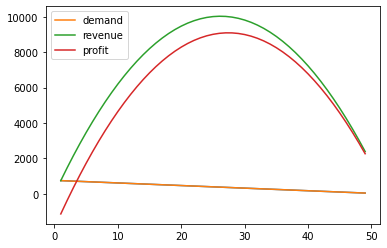

In [17]:
import matplotlib.pyplot as plt
plt.plot(simulation_data.price,simulation_data.expected_demand)
plt.plot(simulation_data.price,simulation_data.expected_demand,label='demand')
plt.plot(simulation_data.price,simulation_data.revenue,label='revenue')
plt.plot(simulation_data.price,simulation_data.profit,label='profit')
plt.legend(loc='upper left')

In [18]:
inv.linear_elasticity(
    pricing_data['price'],
    pricing_data['demand'],
    23, 2.5
)

{'Elasticity': array([[0.78413098]]),
 'optimum_price_profit': array([[27.41591712]]),
 'optimum_price_revenue': array([[26.16591712]])}